In [1]:
from platform import python_version
print(python_version())

3.13.1


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
TLC= pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")
TLC.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [12]:
total_missing= TLC.isnull().sum()
total_missing

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [6]:
TLC.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [14]:
print(TLC["tpep_pickup_datetime"].head())
print("-"*40)
print(TLC["tpep_dropoff_datetime"].head())

0     03/25/2017 8:55:43 AM
1     04/11/2017 2:53:28 PM
2     12/15/2017 7:26:56 AM
3     05/07/2017 1:17:59 PM
4    04/15/2017 11:32:20 PM
Name: tpep_pickup_datetime, dtype: object
----------------------------------------
0     03/25/2017 9:09:47 AM
1     04/11/2017 3:19:58 PM
2     12/15/2017 7:34:08 AM
3     05/07/2017 1:48:14 PM
4    04/15/2017 11:49:03 PM
Name: tpep_dropoff_datetime, dtype: object


In [15]:
TLC['tpep_pickup_datetime'] = pd.to_datetime(TLC['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
print(TLC['tpep_pickup_datetime'].dtype)

datetime64[ns]


In [16]:
TLC['tpep_dropoff_datetime'] = pd.to_datetime(TLC['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
print(TLC['tpep_dropoff_datetime'].dtype)

datetime64[ns]


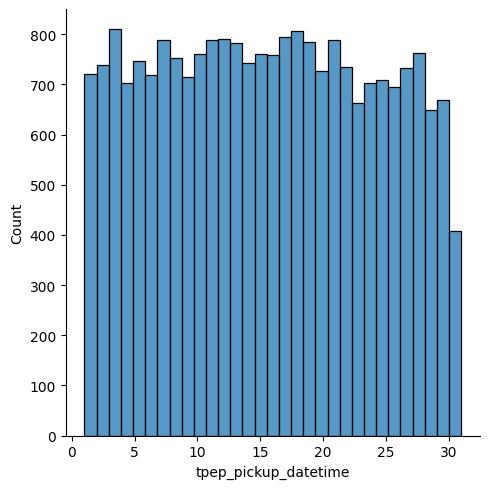

In [17]:
day_of_month = TLC['tpep_pickup_datetime'].dt.day
sns.displot(day_of_month, kde=False, bins=31)

In [13]:
total_data =TLC.shape
total_data

(22699, 18)

In [14]:
print(TLC.describe())

         Unnamed: 0      VendorID  passenger_count  trip_distance  \
count  2.269900e+04  22699.000000     22699.000000   22699.000000   
mean   5.675849e+07      1.556236         1.642319       2.913313   
std    3.274493e+07      0.496838         1.285231       3.653171   
min    1.212700e+04      1.000000         0.000000       0.000000   
25%    2.852056e+07      1.000000         1.000000       0.990000   
50%    5.673150e+07      2.000000         1.000000       1.610000   
75%    8.537452e+07      2.000000         2.000000       3.060000   
max    1.134863e+08      2.000000         6.000000      33.960000   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000  22699.000000   
mean       1.043394    162.412353    161.527997      1.336887     13.026629   
std        0.708391     66.633373     70.139691      0.496211     13.243791   
min        1.000000      1.000000      1.000000      1.000000 

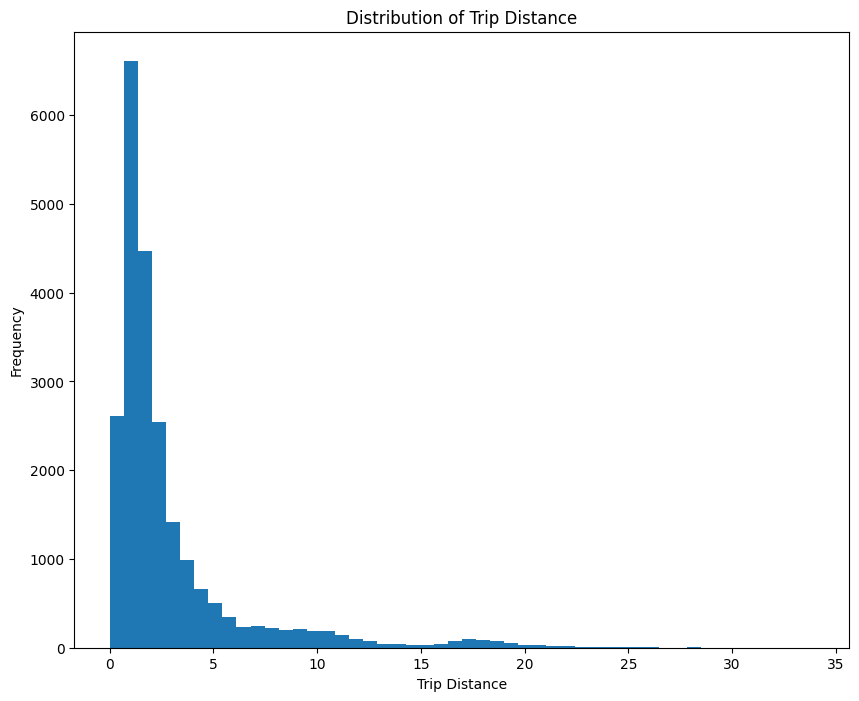

In [9]:
plt.figure(figsize=(10, 8))
plt.hist(TLC['trip_distance'], bins=50)
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distance')
plt.show()

In [18]:
# Calculate the correlation coefficient
correlation = TLC['trip_distance'].corr(TLC['fare_amount'])
print(f"Correlation Coefficient: {correlation}")

Correlation Coefficient: 0.7565989842423745


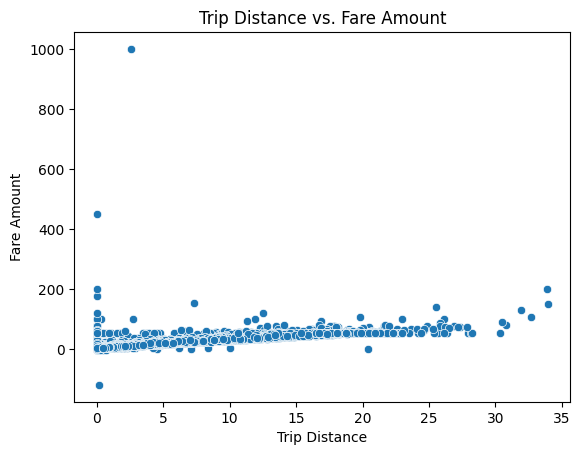

In [19]:
# Create a scatter plot to visualize the relationship
sns.scatterplot(x='trip_distance', y='fare_amount', data=TLC)
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()